## 6.1. Decision Tree

In [21]:
import matplotlib.pyplot as plt
import warnings
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

warnings.filterwarnings(action='ignore')

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

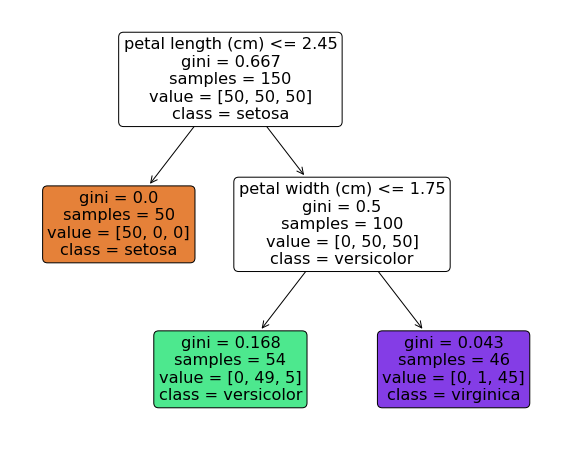

In [31]:
plt.figure(figsize=(10,8))
plot_tree(tree_clf,
          feature_names=iris.feature_names[2:],
          class_names=iris.target_names,
          rounded=True,
          filled=True,
         )

* Decision Tree는 feature scaling이 필요하지 않다는 점에서 효과적이다.   

1. petal length <= 2.45  
1-1. True : setosa  
1-2. False : Next
2. petal width <= 1.75  
2-1. True : versicolor  
2-2. False : virginica

* Sample : 해당 노드로 분류된 훈련샘플의 수  
* Value : 각 class 별로 분류된 훈련샘플의 수  
* Impurity(gini) : 해당 노드로 분류된 훈련샘플이 모두 같은 Class에 속하면 0, 아닐 경우 gini impurity로 평가됨    


* sckitlearn은 Binary Tree만을 만드는 CART 알고리즘을 사용하지만, ID3는 multivariable Decision Tree를 만들 수 있다.

$$
G_i=1-\sum_{k=1}^n p_{i, k}^2
$$

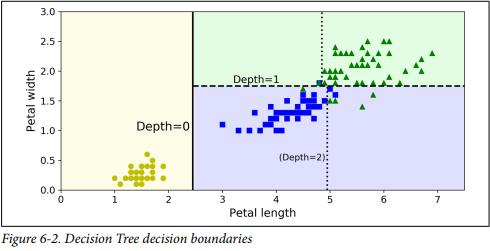

In [29]:
# 예측

print(tree_clf.predict_proba([[5, 1.5]]), tree_clf.predict([[5, 1.5]]))

[[0.         0.90740741 0.09259259]] [1]


## 6.2. CART(Classification and Regression Tree) Algorithm

Equation 6-2. CART cost function for classification
$$
J\left(k, t_k\right)=\frac{m_{\text {left }}}{m} G_{\text {left }}+\frac{m_{\text {right }}}{m} G_{\text {right }}
$$
where $\left\{\begin{array}{l}G_{\text {left/right }} \text { measures the impurity of the left/right subset, } \\ m_{\text {left/right }} \text { is the number of instances in the left/right subset. }\end{array}\right.$  
  
  
* CART은 Greedy Algorithm에 기반을 둔다. 현재 depth에서의 분류가 다음 단계에서의 분류에 어떠한 영향을 미치는지 고려하지 않는다.  
* 그러나 Decision Tree model에서 optimal solution을 찾는 것은 $O(exp(m))$ 시간이 소요되는, 거의 불가능에 가깝다.

## 6.3. Big O

* 각 depth에서 특성값 하나만을 확인하면 되기 때문에 $O(log_{2}(m))$가 예측을 위한 계산복잡도다.  
* 훈련시에는 각 depth에서 모든 샘플의 모든 feature를 비교하기 때문에 $O(n*mlog_{2}(m))$가 훈련복잡도가 된다. 

## 6.4. Entropy as Impurtiy

$H_i=-\sum_{\substack{k=1 \\ p_{i, k} \neq 0}}^n p_{i, k} \log _2\left(p_{i, k}\right)$  

* 특정 노드에서 모든 instance가 하나의 클래스에 속할 때는 Entropy값이 0이 된다. 그러나 분산될 경우 Entropy값이 올라간다.  
* gini와 entropy는 무엇을 선택하든간에 별 차이는 없으나, 전자가 계산이 더 빠르다는 점에서 성능이 좋다.

## 6.5. Regularization

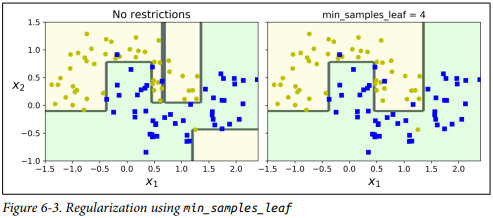

* Decision Tree는 model에 대한 제약조건이 없기 때문에 overfitting이 발생하기 쉽다. nonparametric model이기 때문.    
* 이 때 Regularization을 위해 parameter를 주어 자유도를 제한한다.   


- max_depth : 최대 깊이  
- min_samples_split : 분할되기 위해 node가 가져야할 최소 샘플수  
- min_samples_leaf : leaf node가 가져야할 최소 샘플수
- min_weight_fraction_leaf : 최소 가중치
- max_leaf_nodes : leaf node의 최대수
- max_features : 각 node에서 분할에 사용할 feature의 최대수

## 6.6. Decision Tree Regression

[Text(0.4, 0.8333333333333334, 'petal width (cm) <= 0.8\nsquared_error = 0.667\nsamples = 150\nvalue = 1.0'),
 Text(0.2, 0.5, 'squared_error = 0.0\nsamples = 50\nvalue = 0.0'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\nsquared_error = 0.25\nsamples = 100\nvalue = 1.5'),
 Text(0.4, 0.16666666666666666, 'squared_error = 0.084\nsamples = 54\nvalue = 1.093'),
 Text(0.8, 0.16666666666666666, 'squared_error = 0.021\nsamples = 46\nvalue = 1.978')]

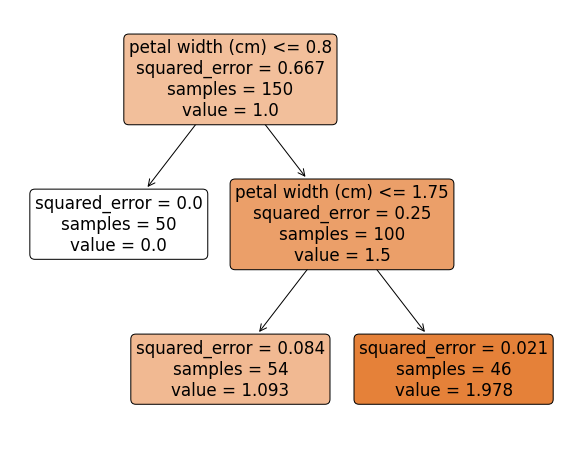

In [34]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth = 2)
tree_reg.fit(X, y)

plt.figure(figsize=(10,8))
plot_tree(tree_reg,
          feature_names=iris.feature_names[2:],
          class_names=iris.target_names,
          rounded=True,
          filled=True,
         )

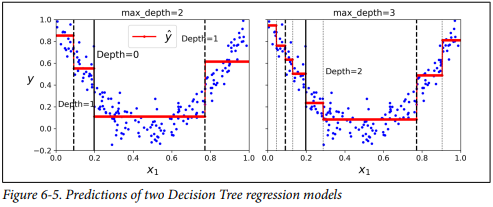

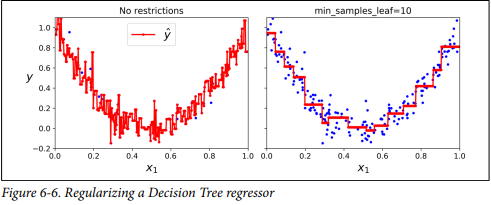

$J\left(k, t_k\right)=\frac{m_{\text {left }}}{m} \mathrm{MSE}_{\text {left }}+\frac{m_{\text {right }}}{m} \mathrm{MSE}_{\text {right }}$ where $\left\{\begin{array}{l}\mathrm{MSE}_{\text {node }}=\sum_{i \in \text { node }}\left(\hat{y}_{\text {node }}-y^{(i)}\right)^2 \\ \hat{y}_{\text {node }}=\frac{1}{m_{\text {node }} i \in \sum_{\text {node }}} y^{(i)}\end{array}\right.$

CART Algortihm을 활용한 Regression은 Impurtiy 대신 MSE를 최소화하는 방향으로 분할한다. 해당 node에 위치한 sample들의 평균이 예측값이 된다.

## 6.7. Instability

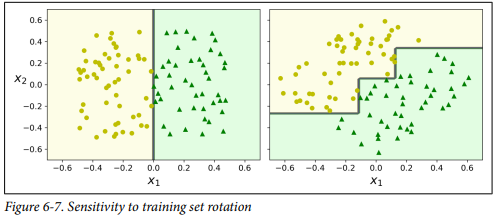

* Decision Tree는 해석 및 이해가 쉽고, 사용이 편리하지만 모든 분할이 축에 수직이기 때문에 데이터의 tilting에 민감하다.  
단순하게 45도 회전한 dataset에 대해 불필요하게 분할선을 구불구불히 형성해야만한다. 이 때문에 일반화가 잘되지 않는다. 

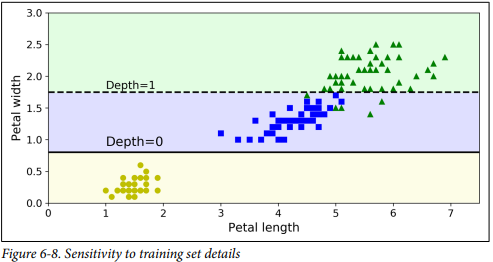

* 작은 변화에도 분할축이 민감하게 반응한다. 기존 dataset에서 petal width가 가장 큰 versicolor(파란색) instance를 하나 제거하니 figure 6-2의 model과는 완전 다른 model이 생성되었다.
* 또한 각 node에서 기준이될 feature를 무작위로 선택하기 때문에(max_features를 설정하면) 동일 dataset에서도 다른 model을 얻게된다.